# Quickstart

The latest release of TAPE is installable via pip, using the following command:

```
pip install lf-tape
```

For more detailed installation instructions, see the [Installation Guide](installation.html).

TAPE provides a scalable framework for analyzing astronomical time series data. Let's walk through a brief example where we calculate the Structure Function for a set of spectroscopically confirmed QSOs. First, we grab the available TAPE Stripe 82 QSO dataset:

In [274]:
from tape import Ensemble
ens = Ensemble() # Initialize a TAPE Ensemble
ens.from_dataset("s82_qso")

/astro/users/atzanida/Desktop/research/tape/src/tape/ensemble.py:2175: UserWarning: Divisions are not known, syncing using a non-lazy method.
  warnings.warn("Divisions are not known, syncing using a non-lazy method.")
/astro/users/atzanida/Desktop/research/tape/src/tape/ensemble.py:2197: UserWarning: Divisions are not known, syncing using a non-lazy method.
  warnings.warn("Divisions are not known, syncing using a non-lazy method.")
/astro/users/atzanida/Desktop/research/tape/src/tape/ensemble.py:1588: UserWarning: Divisions for object are not set, certain downstream dask operations may fail as a result. We recommend setting the `sort` or `sorted` flags when loading data to establish division information.
  warnings.warn(
/astro/users/atzanida/Desktop/research/tape/src/tape/ensemble.py:1588: UserWarning: Divisions for source are not set, certain downstream dask operations may fail as a result. We recommend setting the `sort` or `sorted` flags when loading data to establish division in

This dataset contains 9,258 QSOs, we can view the first 5 entries in the "object" table to get a sense of the available object-level information:

In [275]:
ens.head("object", 5)

,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au
dbID,,,,,,,,,,,,,,
70,2.169302,1.238649,301,-23.901,-24.181,1.0730,0.000,0.000,20.793,20.469,20.197,20.040,20.000,0.116
98,1.091028,0.962126,144,-23.399,-23.576,0.7867,0.000,0.000,20.790,20.183,19.849,19.818,19.430,0.183
233,0.331289,0.177230,58,-24.735,-25.058,1.6199,0.000,0.000,20.892,20.554,20.431,20.199,20.099,0.154
1018,1.364696,-0.098956,190,-23.121,-24.045,0.6125,0.000,45.433,20.098,19.722,19.784,19.485,19.541,0.178
1310,0.221552,-0.292485,36,-26.451,-26.974,2.7563,9.361,46.760,20.707,19.663,19.610,19.705,19.529,0.174


The Ensemble stores data in two `dask` dataframes, object-level information in the "object" table as shown above, and individual time series measurements in the "source" table. As a result, many operations on the Ensemble closely follow operations on `dask` (and by extension `pandas`) dataframes. Let's filter down our large QSO set to a smaller set with the total number of observations per object within a certain range:

In [276]:
ens.calc_nobs() # calculates number of observations, produces "nobs_total" column 
ens = ens.query("nobs_total >= 95 & nobs_total <= 105", "object")

We can now view the entirety of our remaining QSO set:

In [277]:
ens.compute("object")

,ra,dec,SDR5ID,M_i,M_i_corr,redshift,mass_BH,Lbol,u,g,r,i,z,Au,nobs_total
dbID,,,,,,,,,,,,,,,
102187,2.815377,1.249789,406,-22.891,-23.368,0.5804,8.023,45.571,20.777,20.368,19.950,19.570,19.273,0.142,95
138158,10.133773,-0.230790,1541,-22.266,-22.827,0.2419,8.332,45.131,19.090,18.857,18.485,18.085,18.033,0.117,105
187596,10.556096,0.988253,1615,-22.652,-23.392,0.3289,8.392,45.321,19.915,19.185,18.589,18.423,17.770,0.105,95
711662,15.176414,1.083781,2359,-22.703,-23.310,0.6383,0.000,0.000,20.942,20.491,20.330,19.979,19.815,0.117,100
762267,343.360626,0.507056,75223,-22.187,-23.001,0.4627,7.856,45.186,21.107,20.647,20.193,19.855,19.529,0.465,95
1128581,339.200653,1.190031,74754,-24.092,-24.483,0.5481,0.000,45.471,20.410,19.395,18.889,18.333,18.346,0.398,95
1250783,28.063360,0.648427,4283,-23.270,-24.417,0.8656,8.432,45.550,20.865,20.368,20.131,20.169,19.936,0.158,105
1254675,29.243357,0.271094,4485,-22.436,-23.097,0.3593,7.834,45.277,19.277,19.202,19.007,18.873,18.387,0.161,105
1266724,26.613321,0.350273,4077,-22.295,-22.739,0.4051,8.177,45.200,19.993,19.623,19.428,19.300,18.959,0.154,105


Finally, we can calculate the Structure Function for each of these QSOs, using the available TAPE Structure Function Module:

In [279]:
from tape.analysis import calc_sf2
result = ens.batch(calc_sf2, sf_method="macleod_2012") # The batch function applies the provided function to all individual lightcurves within the Ensemble
result.compute()

Using generated label, result_2, for a batch result.


lc_id band           dt          sf2  1_sigma
dbID                                                       
4938823 0   4938823    g   195.141837     0.069303      0.0
        1   4938823    g   677.738157     0.070085      0.0
        2   4938823    g  1352.291003     0.158352      0.0
        3   4938823    i   195.141837     0.016914      0.0
        4   4938823    i   677.738157     0.013114      0.0
...             ...  ...          ...          ...      ...
3777871 10  3777871    u   287.080530     0.083825      0.0
        11  3777871    u   734.527928  7945.318306      0.0
        12  3777871    z    26.076964     0.020663      0.0
        13  3777871    z   287.080530     0.031083      0.0
        14  3777871    z   734.527928     0.027969      0.0

[250 rows x 5 columns]

The result is a table of delta times (dts) and structure function (sf2) for each unique lightcurve (labeled by lc_id). We can now visualize our implemented time series 

(0.001, 10.0)

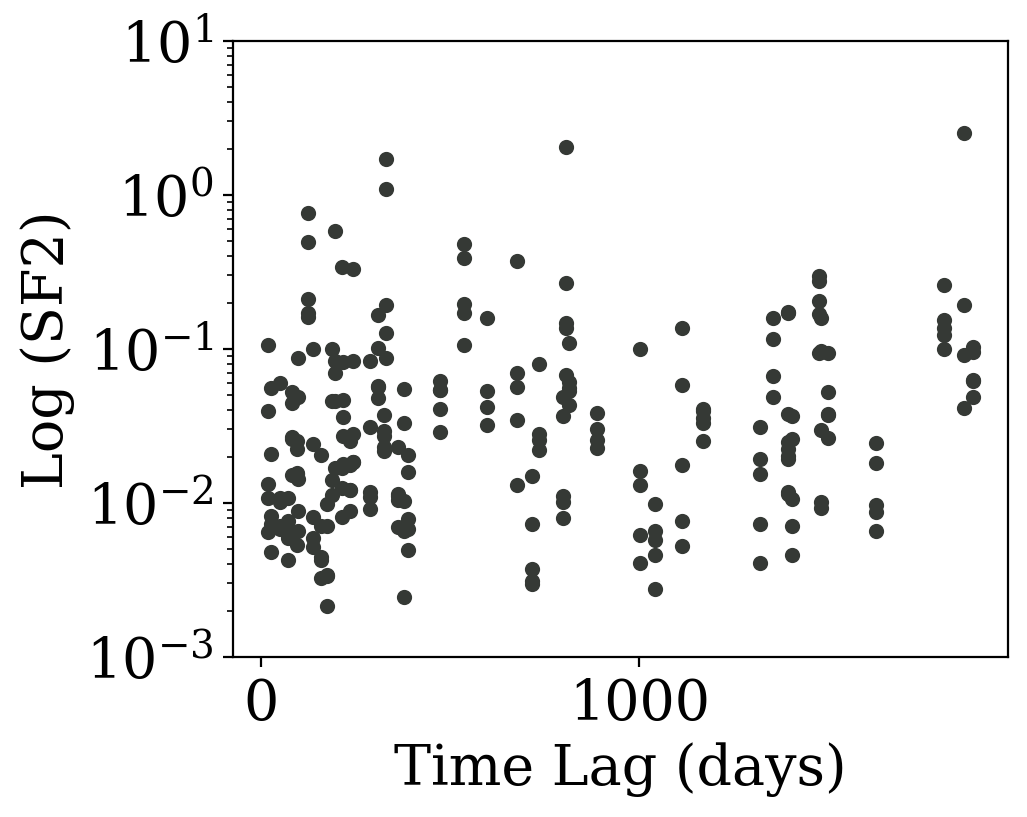

In [280]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
plt.scatter(result["dt"], result["sf2"], s=20, alpha=1, color="#353935")
plt.yscale('log')
plt.ylabel("Log (SF2)")
plt.xlabel("Time Lag (days)")
plt.ylim(1e-3, 1e1)

In [281]:
max_id = result_comp.iloc[result_comp['sf2'].argmax()].lc_id
lc = ens.source.compute().loc[int(max_id)]
lc

,ra_median,dec_median,mjd,flux,error,band
dbID,,,,,,
4938823,55.578236,0.702061,52173.387816,21.560,0.167,u
4938823,55.578236,0.702061,52234.324471,20.883,0.095,u
4938823,55.578236,0.702061,52261.287827,20.994,0.099,u
4938823,55.578236,0.702061,52283.155202,21.229,0.127,u
4938823,55.578236,0.702061,52287.168325,20.988,0.086,u
...,...,...,...,...,...,...
4938823,55.578236,0.702061,53668.403057,19.982,0.151,z
4938823,55.578236,0.702061,53704.365691,19.927,0.160,z
4938823,55.578236,0.702061,54008.448121,19.876,0.087,z


(0.95, 1.05)

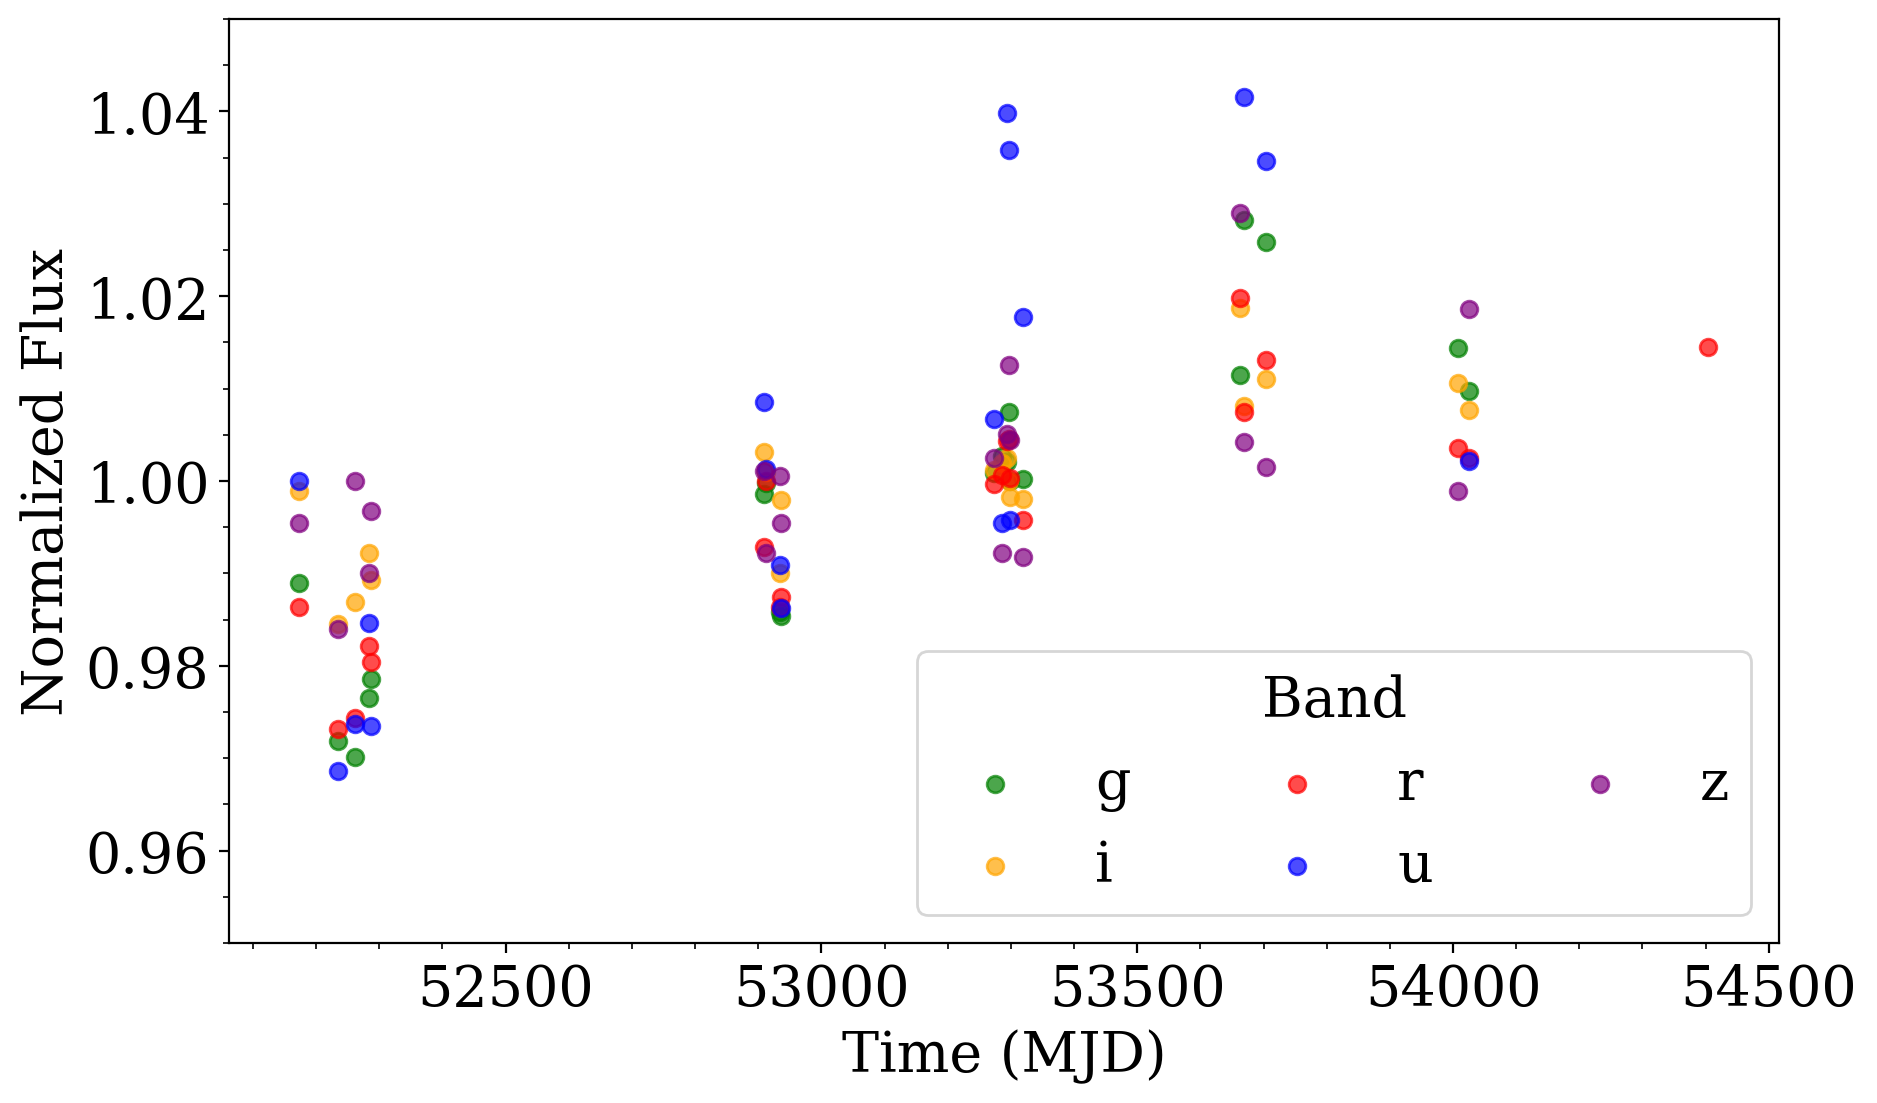

In [282]:
# Normalize flux by median flux for each band
lc['normalized_flux'] = lc.groupby('band')['flux'].transform(lambda x: x / x.median())

# Set color dictionary for each band
band_colors = {'u': 'blue', 'g': 'green', 'r': 'red', 'i': 'orange', 'z': 'purple'}

# Plotting
plt.figure(figsize=(10, 6))
for band, data in lc.groupby('band'):
    plt.scatter(data['mjd'], data['normalized_flux'], label=band, color=band_colors[band], alpha=0.7)

plt.xlabel('Time (MJD)')
plt.ylabel('Normalized Flux')
plt.minorticks_on()
plt.legend(title='Band', ncols=3)
plt.ylim(0.95, 1.05)